In [1]:
# Data Handling
#===================
import pandas as pd

# Data Handling
#===================
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
#===================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print(os.listdir("../datasets/walmart"))
# path = "../datasets/walmart/"

In [2]:
df = pd.read_csv('Assignment-1_Data.csv',sep=';',decimal=',',low_memory=False)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


In [3]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 7 columns and 522064 rows.
The DataFrame has 5286 duplicated values and 135496 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


In [4]:
df.drop_duplicates(inplace=True)
# get the no of rows and columns
df.shape

(516778, 7)

In [5]:
print("#" * 30)
print(" " * 5, "Null Distribution")
print("#" * 30)
null = df.isnull().sum().to_frame().rename(columns = {0:'count'})
null['%'] = (null['count'] / len(df)) * 100.
null = null.sort_values(by = '%', ascending = False)
null.style.background_gradient(cmap = 'PRGn')

##############################
      Null Distribution
##############################


,count,%
CustomerID,133967,25.923511
Itemname,1455,0.281552
BillNo,0,0.000000
Quantity,0,0.000000
Date,0,0.000000
Price,0,0.000000
Country,0,0.000000


In [6]:
df.dropna(subset=['CustomerID', 'Itemname'], inplace=True)
df = df.rename(columns={'Itemname': 'ItemName'})
df['ItemName'] = df['ItemName'].str.lower()
df['CustomerID'] = df['CustomerID'].astype('int')

In [7]:
item_counts = df['ItemName'].value_counts().to_frame().reset_index()
item_counts.columns = ['ItemName', 'Count']
item_counts.head()

,ItemName,Count
0,white hanging heart t-light holder,1964
1,regency cakestand 3 tier,1634
2,jumbo bag red retrospot,1588
3,assorted colour bird ornament,1378
4,party bunting,1362


In [8]:
transactions_original = df.groupby(['BillNo', 'Date'])['ItemName'].apply(lambda x: ', '.join(x)).reset_index()

transactions_original.drop(columns=['BillNo', 'Date'], inplace=True)

transactions_original.head()
# transactions_original

,ItemName
0,"white hanging heart t-light holder, white meta..."
1,"hand warmer union jack, hand warmer red polka dot"
2,"assorted colour bird ornament, poppy's playhou..."
3,"jam making set with jars, red coat rack paris ..."
4,bath building block word


In [9]:
transactions = transactions_original.copy()
transactions_sets = transactions['ItemName'].str.split(', ')
transactions_sets = transactions_sets.apply(lambda x: set(x))
# into a list
transactions_sets = transactions_sets.to_list()

transactions_lists = [list(transaction_set) for transaction_set in transactions_sets]

#  assign unique number for each item that represents the item
unique_items = sorted(set(item for transaction in transactions_lists for item in transaction))

# instead of int make those unique numbers as string
item_to_index = {item: i for i, item in enumerate(unique_items)}
index_to_item = {i: item for item, i in item_to_index.items()}
transactions_indexed = [[item_to_index[item] for item in transaction] for transaction in transactions_lists]

transactions_str = [', '.join(map(str, transaction)) for transaction in transactions_indexed]

# Create a new dataframe with these strings
transactions_final = pd.DataFrame(transactions_str, columns=['ItemName'])

# Display the head of the new dataframe
# transactions_final.head()
# randomly sample 100 transactions
transactions_final = transactions_final.sample(150, random_state=42)

# index the dataset
transactions_final.index = range(150)
# Display the head of the new dataframe
transactions_final.head()




,ItemName
0,"3867, 1358, 3530, 817, 1561, 1791, 3869, 1558,..."
1,"2063, 1728, 1992, 1564, 212, 2751, 1019, 3784,..."
2,"997, 3376, 3564, 1022, 1659, 1661, 412, 3702, ..."
3,"672, 741, 2991, 3682, 1364, 1592, 3765, 3547, ..."
4,"137, 580, 3754, 104, 3318, 111, 3307, 3041, 12..."


In [11]:
transactions = transactions_final.copy()

In [12]:
items_df = transactions['ItemName'].str.split(', ', expand=True).applymap(lambda x: x.strip() if x else x)

# items_df.shape
print(items_df)

       0     1     2     3     4     5     6     7     8     9   ...    79  \
0    1359  1791   817  3867  1561  1358  3530  3869  1558  None  ...  None   
1    1564  2181  2751  3431  1019  2063  2990  1992  1428  3784  ...  None   
2    3702  1755  1642  1764  2153    43  1022   412  1658   724  ...  None   
3     680  2758  3765  3758   672  2518  2856  2997  1592  1501  ...  None   
4    2931   522   580  3754  1419  1216  3745   111  3668  2298  ...  None   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
145  3219  3088  2236   705   583  1961  2562  3216  3213  1927  ...  None   
146  2262   668   778   975  2040   209  3476   705   522  3308  ...  None   
147  2761  1913   828  3447  2518  2605  3384  1358  2768   792  ...  None   
148  3594  3747   200  2331  2613    95  2332    93  3749  2115  ...  None   
149   123  1599  1600  2988  3733  3072  1755  3071  1721  3735  ...  None   

       80    81    82    83    84    85    86    87    88  
0  

In [13]:
# Convert items to boolean columns
df_encoded_1 = pd.get_dummies(items_df, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
df_encoded_1.head()

,1,10,100,1001,1002,1003,1004,1006,1007,101,...,973,975,976,979,98,981,984,992,997,998
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df_binary_1 = df_encoded_1.copy()
# conver true to 1 flase to 0
df_binary_1 = df_binary_1.astype('bool').astype('int')
df_binary_1.head()

,1,10,100,1001,1002,1003,1004,1006,1007,101,...,973,975,976,979,98,981,984,992,997,998
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(transactions_df, min_support=0.03, min_confidence=0.5):
    """
    This function encodes the transactions into boolean values, performs association rule mining,
    and returns the resulting rules.
    
    :param transactions_df: DataFrame with transactions where each item is represented in its own column.
    :param min_support: The minimum support for an itemset to be considered frequent.
    :param min_confidence: The minimum confidence for a rule to be considered.
    :return: DataFrame containing the association rules.
    """
    # Convert items to boolean columns
    # df_encoded = df_encoded
    
    # Perform association rule mining
    frequent_itemsets = apriori(df_encoded_1, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return rules

# Now, use the function and display the association rules
rules = mine_association_rules(items_df)
print("Association Rules:")
print(rules.head())

Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0       (133)       (137)            0.046667            0.066667  0.040000   
1       (137)       (133)            0.066667            0.046667  0.040000   
2       (134)       (137)            0.040000            0.066667  0.033333   
3       (137)       (134)            0.066667            0.040000  0.033333   
4      (1501)      (2758)            0.053333            0.113333  0.040000   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.857143  12.857143  0.036889    6.533333       0.967366  
1    0.600000  12.857143  0.036889    2.383333       0.988095  
2    0.833333  12.500000  0.030667    5.600000       0.958333  
3    0.500000  12.500000  0.030667    1.920000       0.985714  
4    0.750000   6.617647  0.033956    3.546667       0.896714  


In [16]:
len(rules)

39

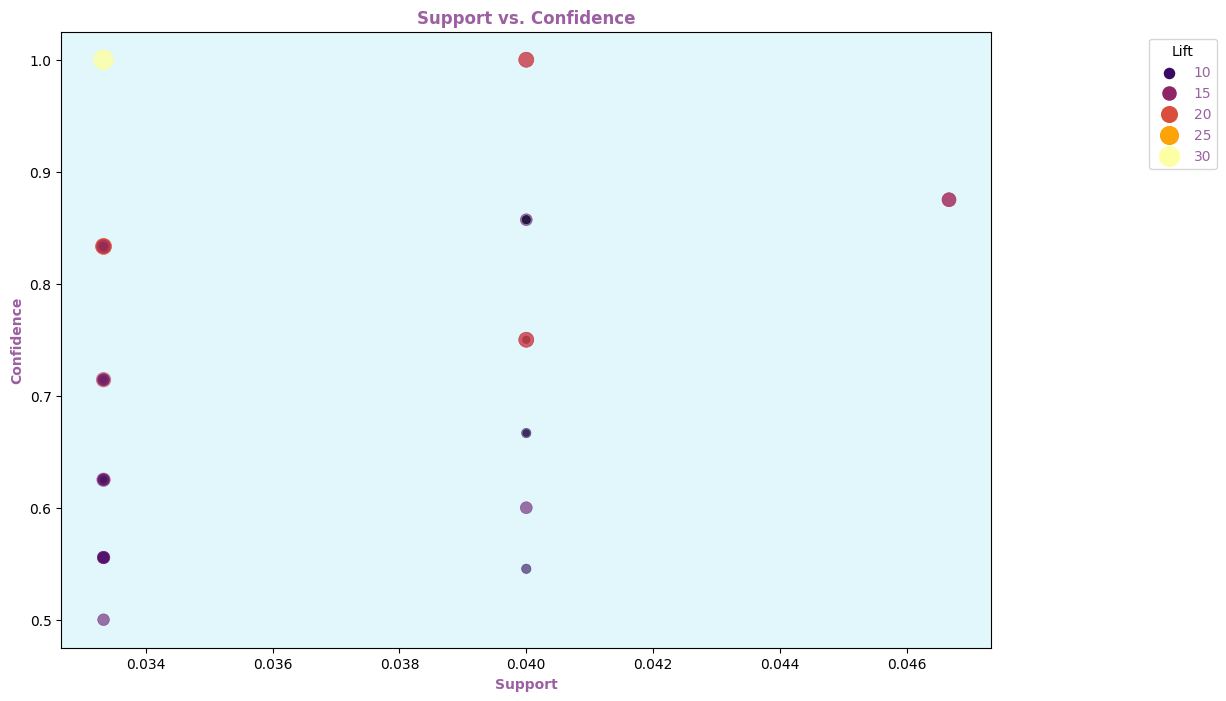

In [17]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Set the background color
plt.axes().set_facecolor('#e1f7fc')  

# Plot scatterplot for Support vs. Confidence
sns.scatterplot(
    x="support",
    y="confidence",
    size="lift",
    data=rules,
    hue="lift",
    palette="inferno", # Color palette
    sizes=(20, 200),
    alpha=0.6,  # Transparency
    edgecolor=None  # Remove edge color for smoother appearance
)

# Customize the plot
plt.title('Support vs. Confidence', color='#9B60A1', fontweight='bold')  # #9B60A1 is purple
plt.xlabel('Support', color='#9B60A1', fontweight='bold')  
plt.ylabel('Confidence', color='#9B60A1', fontweight='bold')  
legend = plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.setp(legend.get_texts(), color='#9B60A1')

# Show the plot
plt.show()

In [18]:
# Assuming 'rules_df' is your DataFrame containing the association rules

# Sort rules by confidence and lift in descending order
sorted_rules_df = rules.sort_values(by=['confidence', 'lift'], ascending=False)

# Select top 5 rules
top_rules_df = sorted_rules_df.head(10)

# Convert antecedents and consequents into a list of tuples, ready for the GA
rules_to_hide = [(set(a), set(c)) for a, c in zip(top_rules_df['antecedents'], top_rules_df['consequents'])]
rules_to_hide

[({'1776'}, {'3148'}),
 ({'3148'}, {'1776'}),
 ({'2758', '2856'}, {'1501'}),
 ({'1501', '2758'}, {'2856'}),
 ({'2856'}, {'1501'}),
 ({'1501'}, {'2856'}),
 ({'133'}, {'137'}),
 ({'1743'}, {'1755'}),
 ({'1501', '2856'}, {'2758'}),
 ({'1659'}, {'1919'})]

In [19]:

# after making into frozen set make into dataframe

rules_to_hide_df = pd.DataFrame(rules_to_hide, columns=['antecedents', 'consequents'])
print(rules_to_hide_df)

# instead of sets make into frozen sets
rules_to_hide_df['antecedents'] = rules_to_hide_df['antecedents'].apply(lambda x: frozenset(x))
rules_to_hide_df['consequents'] = rules_to_hide_df['consequents'].apply(lambda x: frozenset(x))


    antecedents consequents
0        {1776}      {3148}
1        {3148}      {1776}
2  {2856, 2758}      {1501}
3  {2758, 1501}      {2856}
4        {2856}      {1501}
5        {1501}      {2856}
6         {133}       {137}
7        {1743}      {1755}
8  {2856, 1501}      {2758}
9        {1659}      {1919}


In [20]:
rules_to_hide_df
    

,antecedents,consequents
0,(1776),(3148)
1,(3148),(1776)
2,"(2856, 2758)",(1501)
3,"(2758, 1501)",(2856)
4,(2856),(1501)
5,(1501),(2856)
6,(133),(137)
7,(1743),(1755)
8,"(2856, 1501)",(2758)
9,(1659),(1919)


In [21]:
transactions_sets = transactions['ItemName'].str.split(', ')
transactions_sets = transactions_sets.apply(lambda x: set(x))
# into a list
transactions_sets = transactions_sets.to_list()

transactions_lists = [list(transaction_set) for transaction_set in transactions_sets]
# transactions_lists

#  assign unique number for each item that represents the item
# unique_items = sorted(set(item for transaction in transactions_lists for item in transaction))
# item_to_index = {item: i for i, item in enumerate(unique_items)}
# index_to_item = {i: item for item, i in item_to_index.items()}
# transactions_indexed = [[item_to_index[item] for item in transaction] for transaction in transactions_lists]

# transactions_indexed


In [22]:
# len(transactions_lists)

In [23]:
import cProfile

import random
from collections import defaultdict
from deap import base, creator, tools, algorithms
import numpy
import multiprocessing

# Load dataset and target association rules
transactions = transactions_lists.copy()

target_rules = rules_to_hide.copy()

# Define utility functions
def get_transactions_with(items, transactions):
    return [t for t in transactions if all(item in t for item in items)]

def calculate_rule_confidence(rule, transactions):
    lhs, rhs = rule
    lhs_transactions = get_transactions_with(lhs, transactions)
    rhs_transactions = get_transactions_with(rhs, transactions)
    lhs_and_rhs_transactions = get_transactions_with(lhs.union(rhs), transactions)
    if len(lhs_transactions) == 0:
        return 0
    return len(lhs_and_rhs_transactions) / len(lhs_transactions)

def apply_modifications(transactions, individual):
    modified_transactions = []
    for transaction in transactions:
        modified_transaction = transaction.copy()  # Start with a copy of the original transaction
        for rule in target_rules:
            lhs, rhs = rule
            for item in transaction:  # Iterate over the original transaction to avoid iteration issues
                if item in lhs or item in rhs:
                    modification_index = transactions.index(transaction) * len(transaction) + transaction.index(item)
                    modification = individual[modification_index]
                    if modification == 1 and item in lhs and item in modified_transaction:
                        modified_transaction.remove(item)
                    elif modification == 2 and item in rhs and item in modified_transaction:
                        modified_transaction.remove(item)
                    elif modification == 3:
                        if item in lhs and item in modified_transaction:
                            modified_transaction.remove(item)
                        if item in rhs and item in modified_transaction:  # Check again as it may have been removed
                            modified_transaction.remove(item)
        modified_transactions.append(modified_transaction)
    return modified_transactions


# Define fitness function
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

alpha = 0.7
beta = 0.3
# max_modifications = sum(len(t) for t in transactions)
max_modifications = len(transactions_lists)
# target_confidence = 0.03  # Adjust this value to set the desired maximum confidence for the target rules
lower_target_confidence = 0.1  # Example lower bound
upper_target_confidence = 0.4  # Example upper bound





def evaluate_individual(individual):
    modified_dataset = apply_modifications(transactions, individual)
    new_confidences = [calculate_rule_confidence(rule, modified_dataset) for rule in target_rules]
    
    def confidence_penalty(confidence):
        if lower_target_confidence <= confidence <= upper_target_confidence:
            return 0  # No penalty if within the target range
        elif confidence < lower_target_confidence:
            return lower_target_confidence - confidence  # Penalty for being below the range
        else:
            return confidence - upper_target_confidence  # Penalty for being above the range

    avg_penalty = sum(confidence_penalty(conf) for conf in new_confidences) / len(new_confidences)
    
    num_modifications = sum([individual[i] != 0 for i in range(len(individual))])
    utility_score = num_modifications / max_modifications
    
    # Adjust alpha and beta as necessary to balance between penalty and utility preservation
    combined_score = (1 - avg_penalty) * alpha + utility_score * beta
    
    return combined_score, combined_score

# Define genetic operators
toolbox = base.Toolbox()

# pool = multiprocessing.Pool(processes=3)
# toolbox.register("map", pool.map)

toolbox.register("attr_int", random.randint, 0, 3)  # 0: do nothing, 1: remove 'a', 2: remove 'b', 3: remove both
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=len(transactions) * max(len(t) for t in transactions))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=3, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=4)

# Run genetic algorithm
population_size = 300
max_generations = 200
pop = toolbox.population(n=population_size)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=max_generations, stats=stats, verbose=True)

# pool.close()

# Find best individual
best_individual = tools.selBest(pop, 1)[0]

# Apply modifications to dataset
modified_dataset = apply_modifications(transactions, best_individual)

# Calculate resulting rule confidences
new_confidences = [calculate_rule_confidence(rule, modified_dataset) for rule in target_rules]

# Output results
# print("Modifications:")
# for i, transaction in enumerate(transactions):
#     modified_transaction = apply_modifications([transaction], best_individual)[0]
#     print(f"Transaction {i + 1}: {transaction} -> {modified_transaction}")

# After finding the best individual
modified_txn_final = apply_modifications(transactions, best_individual)

# print("Modifications:")
# for i, (original, modified) in enumerate(zip(transactions, modified_txn_final)):
#     print(f"Transaction {i + 1}: {original} -> {modified}")


# print("\nResulting Rule Confidences:")
# for rule, new_confidence in zip(target_rules, new_confidences):
#     # print(f"{rule}: {new_confidence:.2f}")
#     print(f"{rule}: {new_confidence}")
target_confidence = lower_target_confidence
print("\nAnalysis of Trade-off:")
avg_new_confidence = sum(new_confidences) / len(new_confidences)
num_modifications = sum([best_individual[i] != 0 for i in range(len(best_individual))])
print(f"Average Confidence Reduction: {(1 - avg_new_confidence / target_confidence)}")
print(f"Dataset Utility Preservation: {(max_modifications - num_modifications )/ max_modifications}")


gen	nevals	avg    	std     	min    	max   
0  	300   	20.6307	0.103654	20.3527	20.921
1  	267   	20.732 	0.0849993	20.4573	20.952
2  	251   	20.8145	0.0786779	20.5373	21.077
3  	254   	20.8851	0.0661384	20.6273	21.077
4  	253   	20.9487	0.0708069	20.772 	21.114
5  	265   	21.0157	0.0625304	20.818 	21.192
6  	255   	21.0698	0.065882 	20.89  	21.255
7  	235   	21.1263	0.0590534	20.9413	21.307
8  	246   	21.17  	0.059434 	20.9433	21.336
9  	258   	21.2145	0.0648109	21.022 	21.399
10 	244   	21.2651	0.0609485	21.0775	21.41 
11 	252   	21.3101	0.058829 	21.081 	21.454
12 	238   	21.349 	0.0566163	21.121 	21.488
13 	260   	21.3816	0.0535821	21.164 	21.496
14 	269   	21.4166	0.0617799	21.214 	21.566
15 	241   	21.4488	0.0577354	21.234 	21.573
16 	254   	21.4855	0.0583552	21.309 	21.602
17 	243   	21.526 	0.0510421	21.32  	21.638
18 	260   	21.5517	0.0536827	21.344 	21.651
19 	261   	21.5733	0.0602219	21.3693	21.711
20 	262   	21.6042	0.0577558	21.364 	21.724
21 	247   	21.6358	0.0544275	21.39

In [24]:
len(modified_txn_final), transactions_final.shape

(150, (150, 1))

In [25]:
# # save this as txt file
# with open('modified_txn_final.txt', 'w') as f:
#     for item in modified_txn_final:
#         f.write("%s\n" % item)

In [26]:
modified_txn_final_copy = modified_txn_final.copy()


In [27]:
modified_txn_final_copy = pd.DataFrame(modified_txn_final_copy)
modified_txn_final_copy

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1358,1561,1791,817,3869,1359,3867,3530,1558,None,...,None,None,None,None,None,None,None,None,None,None
1,3784,2684,3431,2181,1428,1019,1564,2063,1165,2115,...,None,None,None,None,None,None,None,None,None,None
2,528,3702,1722,1004,1658,3564,2153,2667,1660,1661,...,None,None,None,None,None,None,None,None,None,None
3,3547,1364,3758,1592,3682,672,3765,680,2518,741,...,None,None,None,None,None,None,None,None,None,None
4,3754,2984,111,1216,104,2746,790,3303,1419,3601,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3088,1927,3216,583,2236,705,2562,1961,3213,3219,...,None,None,None,None,None,None,None,None,None,None
146,1527,976,2804,1932,2595,704,2750,973,111,1937,...,None,None,None,None,None,None,None,None,None,None
147,359,2764,3357,1939,1932,189,2722,1592,3384,2611,...,None,None,None,None,None,None,None,None,None,None
148,3290,93,475,2331,1572,3749,2016,2115,95,2375,...,None,None,None,None,None,None,None,None,None,None


In [28]:
item_df_2 = modified_txn_final_copy.copy()


In [29]:
df_encoded_2 = pd.get_dummies(item_df_2, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
df_encoded_2.head()

,1,10,100,1001,1002,1003,1004,1006,1007,101,...,973,975,976,979,98,981,984,992,997,998
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df_binary_2 = df_encoded_2.copy()
df_binary_2 = df_binary_2.astype('bool').astype('int')

In [31]:
# # df_binary_1.shape, df_binary_2.shape
# # get the lenght of eaach row
# print(df_binary_1.shape[1], df_binary_2.shape[1])
# print(df_binary_1.sum(axis=1).sum(), df_binary_2.sum(axis=1).sum())
# differnce = df_binary_1.shape[1] - df_binary_2.shape[1]
# # utility_preservation = df_binary_2.sum(axis=1).sum() / df_binary_1.sum(axis=1).sum()
# no_colums_df_1 = df_binary_1.shape[1]
# no_colums_df_2 = df_binary_2.shape[1]

# utility_preservation = 1 - (no_colums_df_1 - no_colums_df_2) / no_colums_df_1
# utility_preservation,differnce


In [32]:
items_df

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1359,1791,817,3867,1561,1358,3530,3869,1558,None,...,None,None,None,None,None,None,None,None,None,None
1,1564,2181,2751,3431,1019,2063,2990,1992,1428,3784,...,None,None,None,None,None,None,None,None,None,None
2,3702,1755,1642,1764,2153,43,1022,412,1658,724,...,None,None,None,None,None,None,None,None,None,None
3,680,2758,3765,3758,672,2518,2856,2997,1592,1501,...,None,None,None,None,None,None,None,None,None,None
4,2931,522,580,3754,1419,1216,3745,111,3668,2298,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3219,3088,2236,705,583,1961,2562,3216,3213,1927,...,None,None,None,None,None,None,None,None,None,None
146,2262,668,778,975,2040,209,3476,705,522,3308,...,None,None,None,None,None,None,None,None,None,None
147,2761,1913,828,3447,2518,2605,3384,1358,2768,792,...,None,None,None,None,None,None,None,None,None,None
148,3594,3747,200,2331,2613,95,2332,93,3749,2115,...,None,None,None,None,None,None,None,None,None,None


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(transactions_df, min_support=0.03, min_confidence=0.5):
    """
    This function encodes the transactions into boolean values, performs association rule mining,
    and returns the resulting rules.
    
    :param transactions_df: DataFrame with transactions where each item is represented in its own column.
    :param min_support: The minimum support for an itemset to be considered frequent.
    :param min_confidence: The minimum confidence for a rule to be considered.
    :return: DataFrame containing the association rules.
    """
    # Convert items to boolean columns
    # df_encoded = df_encoded
    
    # Perform association rule mining
    frequent_itemsets = apriori(df_encoded_2, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return rules

# Now, use the function and display the association rules
rules_after_hidden = mine_association_rules(item_df_2)
print("Association Rules:")
print(rules_after_hidden.head())

Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0       (726)      (1532)            0.040000            0.053333  0.033333   
1      (1532)       (726)            0.053333            0.040000  0.033333   
2      (1600)      (1599)            0.060000            0.040000  0.033333   
3      (1599)      (1600)            0.040000            0.060000  0.033333   
4      (1942)      (1928)            0.040000            0.060000  0.033333   

   confidence       lift  leverage  conviction  zhangs_metric  
0    0.833333  15.625000  0.031200        5.68       0.975000  
1    0.625000  15.625000  0.031200        2.56       0.988732  
2    0.555556  13.888889  0.030933        2.16       0.987234  
3    0.833333  13.888889  0.030933        5.64       0.966667  
4    0.833333  13.888889  0.030933        5.64       0.966667  


In [34]:
len(rules_after_hidden),len(rules)

(16, 39)

In [35]:
# print(df_binary_1.shape[1], df_binary_2.shape[1])
# print(df_binary_1.sum(axis=1).sum(), df_binary_2.sum(axis=1).sum())
# differnce = df_binary_1.shape[1] - df_binary_2.shape[1]
# # utility_preservation = df_binary_2.sum(axis=1).sum() / df_binary_1.sum(axis=1).sum()
# no_colums_df_1 = df_binary_1.shape[1]
# no_colums_df_2 = df_binary_2.shape[1]

# utility_preservation = 1 - (no_colums_df_1 - no_colums_df_2) / no_colums_df_1
# print("no of rules before hidden",len(rules))
# print("no of rules after hidden",len(rules_after_hidden))
# print("utility_preservation",utility_preservation)
# print("differnce",differnce)


In [36]:
sorted_rules_df_2 = rules_after_hidden.sort_values(by=['confidence', 'lift'], ascending=False)

In [37]:
# Convert 'antecedents' and 'consequents' to frozenset for both dataframes
sorted_rules_df['antecedents'] = sorted_rules_df['antecedents'].apply(frozenset)
sorted_rules_df['consequents'] = sorted_rules_df['consequents'].apply(frozenset)
sorted_rules_df_2['antecedents'] = sorted_rules_df_2['antecedents'].apply(frozenset)
sorted_rules_df_2['consequents'] = sorted_rules_df_2['consequents'].apply(frozenset)


In [67]:

# Merge both dataframes to find common entries
common_entries = pd.merge(sorted_rules_df, sorted_rules_df_2, on=['antecedents', 'consequents'])

# Find entries unique to sorted_rules_df
unique_sorted_rules_df = sorted_rules_df[~sorted_rules_df[['antecedents', 'consequents']].apply(frozenset, axis=1).isin(
    sorted_rules_df_2[['antecedents', 'consequents']].apply(frozenset, axis=1))]

# Find entries unique to sorted_rules_df_2
unique_sorted_rules_df_2 = sorted_rules_df_2[~sorted_rules_df_2[['antecedents', 'consequents']].apply(frozenset, axis=1).isin(
    sorted_rules_df[['antecedents', 'consequents']].apply(frozenset, axis=1))]

# compare the rules in the unique_sorted_rules_df_2 and rules_to_hide_df and get their data like support, confidence, lift

hidden_rules_data_df = pd.merge(common_entries, rules_to_hide_df, on=['antecedents', 'consequents'])




,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y


In [61]:

print("shapes before and after",df_binary_1.shape, df_binary_2.shape)
# print(df_binary_1.sum(axis=1).sum(), df_binary_2.sum(axis=1).sum())

# utility_preservation = df_binary_2.sum(axis=1).sum() / df_binary_1.sum(axis=1).sum()
no_colums_df_1 = df_binary_1.shape[1]
no_colums_df_2 = df_binary_2.shape[1]

# difference in lengths of each rows and its sum
diff = 0
for i in range(df_binary_1.shape[0]):
    diff += abs(df_binary_1.iloc[i].sum() - df_binary_2.iloc[i].sum())

total = 0
for i in range(df_binary_1.shape[0]):
    total += df_binary_1.iloc[i].sum()
    

utility_preservation = 1 - (diff / total)
print("no of rules before hidden",len(rules))
print("no of rules after hidden",len(rules_after_hidden))
print("rules lost ratio",(len(rules_after_hidden) / len(rules)) * 100)
print("difference in total items in each row",diff)
print("utility_preservation",utility_preservation)
print("differnce in rules",len(rules) - len(rules_after_hidden))
print("Hidden rules presnt after hiding",len(hidden_rules_data_df))


shapes before and after (150, 1486) (150, 1485)
no of rules before hidden 39
no of rules after hidden 16
rules lost ratio 41.02564102564102
difference in total items in each row 63
utility_preservation 0.9800443458980045
differnce in rules 23
Hidden rules presnt after hiding 0


In [66]:
import plotly.graph_objects as go

# Initialize the 3D scatter plot
fig = go.Figure()

# Add the common entries scatter plot
fig.add_trace(go.Scatter3d(
    x=common_entries['support_x'],
    y=common_entries['confidence_x'],
    z=common_entries['lift_x'],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.5),
    name='Common'
))

# Add the unique to sorted_rules_df scatter plot
fig.add_trace(go.Scatter3d(
    x=unique_sorted_rules_df['support'],
    y=unique_sorted_rules_df['confidence'],
    z=unique_sorted_rules_df['lift'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.5),
    name='hidden'
))

# Add the unique to sorted_rules_df_2 scatter plot
fig.add_trace(go.Scatter3d(
    x=unique_sorted_rules_df_2['support'],
    y=unique_sorted_rules_df_2['confidence'],
    z=unique_sorted_rules_df_2['lift'],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.5),
    name='df_2'
))

# Set the layout for the plot
fig.update_layout(
    title='3D Scatter Plot of Association Rules',
    scene=dict(
        xaxis_title='Support',
        yaxis_title='Confidence',
        zaxis_title='Lift'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()


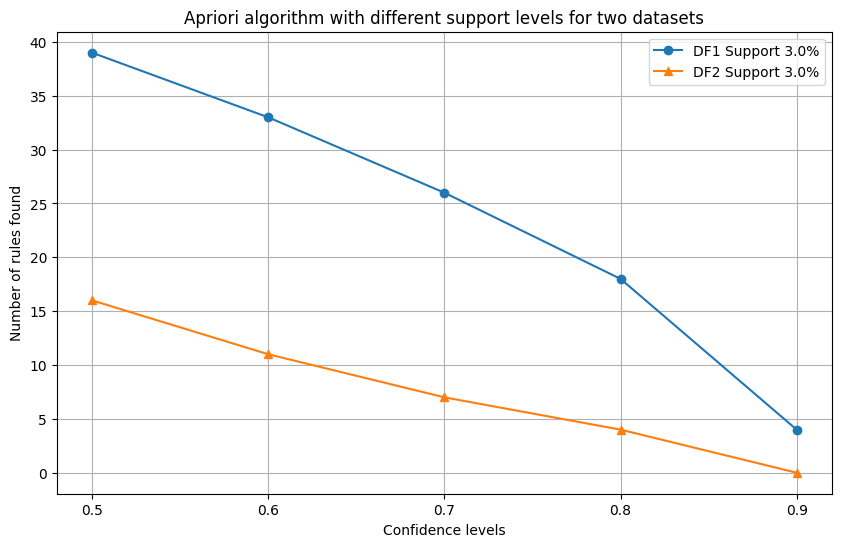

In [57]:
# Plotting the number of rules found for different support levels and confidence levels

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming df_binary_1 and df_binary_2 are your dataframes with binary encoded data

# Define a range of minimum support values and confidence levels
min_support_values = [0.03]
confidence_levels = np.arange(0.5, 1.0, 0.1)

# Initialize dictionaries to store the number of rules for each dataframe
rules_count_1 = {s: [] for s in min_support_values}
rules_count_2 = {s: [] for s in min_support_values}

# Function to compute rules
def compute_rules(df_binary, rules_count):
    for min_support in min_support_values:
        # Apply the Apriori algorithm to find frequent itemsets
        frequent_itemsets = apriori(df_binary, min_support=min_support, use_colnames=True)

        for conf in confidence_levels:
            # Generate association rules
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
            # Count the number of rules
            rules_count[min_support].append(len(rules))

# Compute rules for both dataframes
compute_rules(df_binary_1, rules_count_1)
compute_rules(df_binary_2, rules_count_2)

# Plotting the results on the same graph
plt.figure(figsize=(10, 6))

for min_support, counts in rules_count_1.items():
    plt.plot(confidence_levels, counts, marker='o', label=f'DF1 Support {min_support*100}%')

for min_support, counts in rules_count_2.items():
    plt.plot(confidence_levels, counts, marker='^', label=f'DF2 Support {min_support*100}%')

plt.title('Apriori algorithm with different support levels for two datasets')
plt.xlabel('Confidence levels')
plt.ylabel('Number of rules found')
plt.xticks(confidence_levels)
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# utiltiy function
print(len(unique_sorted_rules_df))
utility = 1 - (len(unique_sorted_rules_df)/len(rules))
utility*100

23


41.02564102564102

In [44]:
# no of rules hidden
len(unique_sorted_rules_df)

23

In [45]:
# new rules
len(unique_sorted_rules_df_2)

0

In [70]:
import pandas as pd

# Function to convert frozensets to a string representation
def frozenset_to_string(frozenset_column):
    return frozenset_column.apply(lambda x: ', '.join(x))

# Apply the conversion to both DataFrames
rules['antecedents'] = frozenset_to_string(rules['antecedents'])
rules['consequents'] = frozenset_to_string(rules['consequents'])
rules_after_hidden['antecedents'] = frozenset_to_string(rules_after_hidden['antecedents'])
rules_after_hidden['consequents'] = frozenset_to_string(rules_after_hidden['consequents'])

# Add a column to distinguish between the two sets of rules
rules['Dataset'] = 'Before Sanitization'
rules_after_hidden['Dataset'] = 'After Sanitization'

# Combine the two DataFrames for plotting
combined_rules = pd.concat([rules, rules_after_hidden])

# Now, you should be able to plot without errors
import plotly.express as px

fig = px.scatter_3d(combined_rules,
                    x='support',
                    y='confidence',
                    z='lift',
                    color='Dataset',
                    hover_data=['antecedents', 'consequents'])

fig.show()


In [46]:
len(rules)-len(rules_after_hidden)

23

In [47]:
rules_after_hiding= rules_after_hidden.copy()

In [48]:
import pandas as pd
import plotly.graph_objects as go

# in each atecedents and consequents sort them firt in their own list and then sort the list
rules['antecedents'] = rules['antecedents'].apply(lambda x: sorted(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: sorted(list(x)))

rules_after_hiding['antecedents'] = rules_after_hiding['antecedents'].apply(lambda x: sorted(list(x)))
rules_after_hiding['consequents'] = rules_after_hiding['consequents'].apply(lambda x: sorted(list(x)))

# Convert 'antecedents' and 'consequents' to strings for comparison
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)
rules_after_hiding['rule'] = rules_after_hiding['antecedents'].astype(str) + ' -> ' + rules_after_hiding['consequents'].astype(str)

# Identify common rules
common_rules = set(rules['rule']).intersection(set(rules_after_hiding['rule']))

# Mark rules as 'Common', 'Before Hiding Only', or 'After Hiding Only'
rules['Rule Type'] = rules['rule'].apply(lambda x: 'Common' if x in common_rules else 'Before Hiding Only')
rules_after_hiding['Rule Type'] = rules_after_hiding['rule'].apply(lambda x: 'Common' if x in common_rules else 'After Hiding Only')

# Prepare plot data
plot_data = pd.concat([rules, rules_after_hiding])

# Color mapping
color_map = {
    'Before Hiding Only': 'blue',
    'After Hiding Only': 'red',
    'Common': 'green'
}

# Plot
fig = go.Figure()

for rule_type, color in color_map.items():
    subset = plot_data[plot_data['Rule Type'] == rule_type]
    fig.add_trace(go.Scatter3d(x=subset['support'], y=subset['confidence'], z=subset['lift'],
                               mode='markers',
                               marker=dict(size=5, color=color),
                               name=rule_type,
                               text=subset['rule'],  # Use the rule column for hover text
                               hoverinfo='text+name'))

# Layout
fig.update_layout(title='Association Rules: Support, Confidence, and Lift Comparison',
                  scene=dict(
                      xaxis_title='Support',
                      yaxis_title='Confidence',
                      zaxis_title='Lift'
                  ),
                  legend_title="Rule Type")

fig.show()
